In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['advertising.csv']


In [44]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [45]:
dataset = pd.read_csv('../input/advertising.csv')
print(dataset.shape)
dataset.describe()

(200, 4)


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


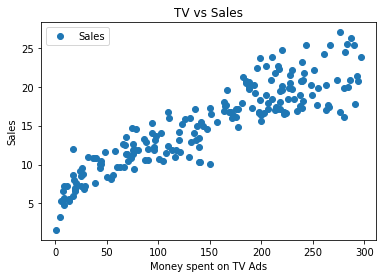

In [46]:
## 2D-plot for Money spent on TV Ads and its effect on Sales
dataset.plot(x='TV', y='Sales', style='o')  
plt.title('TV vs Sales')  
plt.xlabel('Money spent on TV Ads')  
plt.ylabel('Sales')  
plt.show()

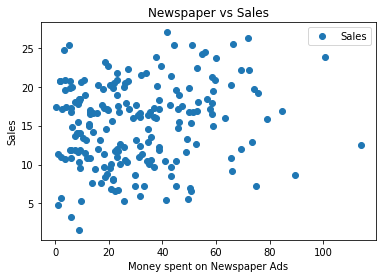

In [47]:
## 2D-plot for Money spent on Newspaper Ads and its effect on Sales
dataset.plot(x='Newspaper', y='Sales', style='o')  
plt.title('Newspaper vs Sales')  
plt.xlabel('Money spent on Newspaper Ads')  
plt.ylabel('Sales')  
plt.show()

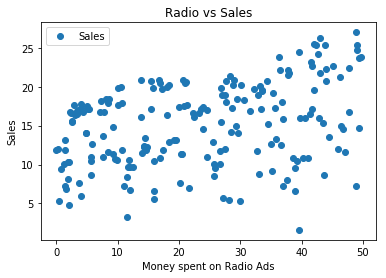

In [48]:
## 2D-plot for Money spent on Radio Ads and its effect on Sales
dataset.plot(x='Radio', y='Sales', style='o')  
plt.title('Radio vs Sales')  
plt.xlabel('Money spent on Radio Ads')  
plt.ylabel('Sales')  
plt.show()

In [49]:
## Basic preprocessing to find whether dataset has noisy data
print(dataset.isna().any())

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool


In [50]:
## Our next step is to divide the data into “attributes” and “labels”. 
## Attributes are the independent variables while labels are dependent variables whose values are to be predicted. 
X = dataset['TV'].values.reshape(-1,1) # Attributes/Features
y = dataset['Sales'].values.reshape(-1,1) # Label

In [51]:
## To split the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
# Simple linear regression model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
## The linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. 
## To see the value of the intercept and slop calculated by the linear regression algorithm for our dataset

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

## This means that for every one unit of effect in TV ads, the Effect in the sales is about 0.054%.

[7.16227597]
[[0.0544343]]


In [54]:
## To predict the test data with our trained model
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,11.3,10.929130
1,8.4,9.883991
2,12.0,12.083137
3,25.4,22.931893
4,16.7,16.426994
5,8.7,10.221484
6,7.2,7.635854
7,18.2,20.231952
8,9.2,8.457812
9,16.6,17.918494


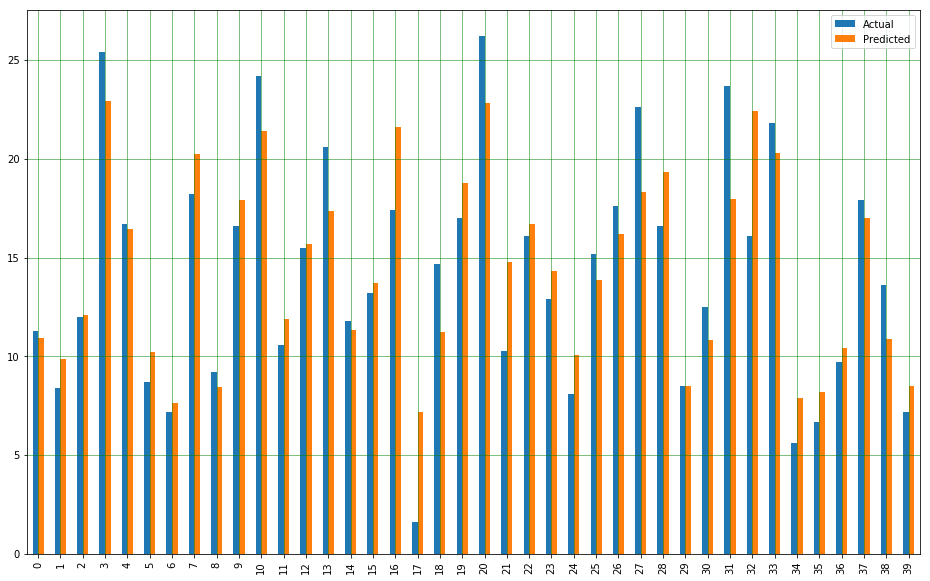

In [55]:
## Bar graph representation on actual vs predicted by the model
df1 = df
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

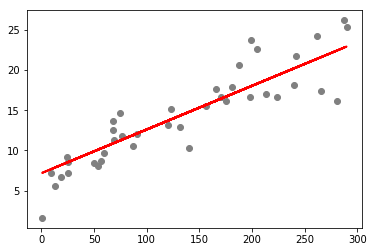

In [56]:
## Below Visualization to see the linear fit of our model with actual and prediction.

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [57]:
## For Regression, there are three metrics to consider which are shown below

## Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
## Mean Squared Error (MSE) is the mean of the squared errors
## Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.014867314759479
Mean Squared Error: 6.6390912265593
Root Mean Squared Error: 2.576643403065178
